## Library 설치

In [1]:
# pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.4 MB/s eta 0:00:00


## Library Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import koreanize_matplotlib
plt.rcParams['font.family'] = 'NanumGothic'

import re
from wordcloud import WordCloud
import matplotlib.font_manager as fm

from mlxtend.frequent_patterns import apriori, association_rules

from collections import Counter
from itertools import combinations


# 만개의 레시피 데이터

In [186]:
recipe = pd.read_csv('/content/drive/MyDrive/data/레시피/salad_recipe.csv', encoding='euc-kr')

In [187]:
df = recipe[['RCP_SNO', 'CKG_NM', 'INQ_CNT', 'RCMM_CNT', 'SRAP_CNT', 'CKG_MTRL_CN', 'CKG_INBUN_NM', 'CKG_TIME_NM']]

## 1. '샐러드' 키워드가 포함된 샐러드 요리별 총합 조회수 비교 및 메뉴 **선정**

In [188]:
# 요리명에 '샐러드' 키워드가 포함된 레시피 데이터 리스트 추출
salad_target = df[df['CKG_NM'].str.contains('샐러드', na=False)]

# 샐러드 요리별 총합 조회수 계산 및 정렬
total_inq_salad = salad_target.groupby('CKG_NM')['INQ_CNT'].sum().reset_index()
result = total_inq_salad.sort_values('INQ_CNT', ascending=False).head(20).reset_index(drop=True)

result

,CKG_NM,INQ_CNT
0,감자샐러드,2718419
1,닭가슴살샐러드,1363358
2,단호박샐러드,1195462
3,양배추샐러드,1058963
4,연어샐러드,929255
5,과일샐러드,927523
6,두부샐러드,790797
7,감자샐러드샌드위치,761320
8,연두부샐러드,425434
9,훈제연어샐러드,401126


*   메뉴 선정
  1.   감자 샐러드
  2.   닭가슴살 샐러드
  3.   단호박 샐러드
  4.   양배추 샐러드
  5.   연어 샐러드
  6.   과일 샐러드
  7.   두부 샐러드

## 2. 선정 메뉴별 데이터 추출

In [189]:
cond_salad = df['CKG_NM'].str.contains('샐러드')
cond1 = df['CKG_NM'].str.contains('감자')
cond2 = df['CKG_NM'].str.contains('닭가슴살')
cond3 = df['CKG_NM'].str.contains('단호박')
cond4 = df['CKG_NM'].str.contains('양배추')
cond5 = df['CKG_NM'].str.contains('연어')
cond6 = df['CKG_NM'].str.contains('과일')
cond7 = df['CKG_NM'].str.contains('두부')

potato_salad = df[cond_salad & cond1].dropna(subset=['CKG_MTRL_CN'])
chicken_breast_salad = df[cond_salad & cond2].dropna(subset=['CKG_MTRL_CN'])
pumpkin_salad = df[cond_salad & cond3].dropna(subset=['CKG_MTRL_CN'])
cabbage_salad = df[cond_salad & cond4].dropna(subset=['CKG_MTRL_CN'])
salmon_salad = df[cond_salad & cond5].dropna(subset=['CKG_MTRL_CN'])
fruit_salad = df[cond_salad & cond6].dropna(subset=['CKG_MTRL_CN'])
tofu_salad = df[cond_salad & cond7].dropna(subset=['CKG_MTRL_CN'])

### 감자샐러드

In [ ]:
potato_salad.sort_values('INQ_CNT')

,RCP_SNO,CKG_NM,INQ_CNT,RCMM_CNT,SRAP_CNT,CKG_MTRL_CN,CKG_INBUN_NM,CKG_TIME_NM
184969,7014686,명란감자샐러드,56,0,1,[재료 60인분] 명란젓 1kg| 감자 4kg| 게맛살 500g [양념] 마요네즈 ...,6인분이상,60분이내
172546,7001734,파인애플감자샐러드,135,0,2,[감자샐러드] 감자| 파인애플통조림| 양파| 블루베리| 버터| 마요네즈| 꿀| 소금...,6인분이상,60분이내
180192,7009698,파프리카감자구이샐러드,143,0,3,[재료] 감자 4개| 파프리카 2개| 크래미 3개| 모짜렐라 치즈| 옥수수 알갱이|...,2인분,60분이내
179507,7009001,감자샐러드,192,0,4,[재료] 감자 4개| 미니단호박 1개| 적양파 1개| 소금| 후추| 마요네즈 2큰술...,3인분,30분이내
178079,7007526,감자샐러드또띠아샌드위치,223,0,2,[재료] 또띠아| 감자샐러드| 케첩| 모짜렐라치즈,2인분,30분이내
...,...,...,...,...,...,...,...,...
42939,6850525,달걀감자샐러드,134616,20,630,[재료] 감자 4개| 당근 10g| 오이 10g| 마요네즈 3T| 후추 약간| 소금...,2인분,30분이내
27861,6830406,감자샐러드샌드위치,138322,81,2273,[재료] 감자 3개| 달걀 3개| 양파 1/2개| 오이 1/2개| 당근 약간| 식빵...,3인분,30분이내
74886,6892050,감자샐러드,179844,0,679,[재료] 감자| 소금| 설탕| 오이| 당근| 통조림옥수수| 마요네즈| 후추,4인분,30분이내
13500,3989737,감자샐러드,271550,63,7275,[재료] 감자 2개| 계란 2개| 오이 1/4개| 맛살 2개 [양념] 마요네즈 2큰...,2인분,30분이내


### 닭가슴살샐러드

In [ ]:
chicken_breast_salad.sort_values('INQ_CNT')

,RCP_SNO,CKG_NM,INQ_CNT,RCMM_CNT,SRAP_CNT,CKG_MTRL_CN,CKG_INBUN_NM,CKG_TIME_NM
178557,7008015,닭가슴살샐러드,106,0,6,[재료] 닭가슴살 1팩| 아보카도 1/2개| 완숙토마토 1개| 발사믹크림,1인분,10분이내
169507,6998562,닭가슴살샐러드,202,0,7,[재료] 닭가슴살 소시지 2개| 식용유 1큰술| 양배추 2장| 적양배추 1장| 당근...,2인분,NaN
156306,6983370,닭가슴살샐러드,284,0,8,[재료] 스팀 닭가슴살 50g| 새싹채소 1줌| 양상추 약간| 블루베리1/2컵| 방...,2인분,10분이내
171925,7001096,주꾸미닭가슴살미나리샐러드,304,0,6,[재료] 닭가슴살 150g| 쭈꾸미 8마리| 미나리 1줌| 홍고추 1개| 밀가루 1...,2인분,30분이내
162543,6990844,미역닭가슴살샐러드,308,0,6,[재료] 불린 미역 1줌| 닭가슴살 1/2개| 당근 50g| 적양파 1/2개| 잣 ...,2인분,15분이내
...,...,...,...,...,...,...,...,...
11486,3070308,닭가슴살샐러드,73126,16,243,[재료] 닭가슴살 1캔(90g)| 미니파프리카 2개| 양상추 적당량| 적양파(선택)...,2인분,30분이내
44913,6853059,닭가슴살샐러드,81489,40,1148,[재료] 닭가슴살 3조각| 오이 1개| 양파 1컵| 당근 1/2컵| 단무지 1/2컵...,6인분이상,60분이내
17643,5361148,닭가슴살크루통샐러드,83349,13,1555,[재료] 훈제닭가슴살캔 1개| 토마토 1개| 양상추| 브로콜리| 레몬| 식빵 2장|...,1인분,15분이내
11346,2998440,닭가슴살샐러드,159203,24,1312,[재료] 닭가슴살 1쪽| 브로콜리| 양파| 파프리카 [양념] 저염간장 2T| 홀그레...,2인분,30분이내


### 연어샐러드

In [ ]:
salmon_salad

,RCP_SNO,CKG_NM,INQ_CNT,RCMM_CNT,SRAP_CNT,CKG_MTRL_CN,CKG_INBUN_NM,CKG_TIME_NM
253,578044,연어계란샐러드,4959,7,25,[재료] 양상추| 돈나물| 계란 5개| 훈제연어 1팩 [양념] 소금 0.3작은술| ...,3인분,30분이내
714,731787,훈제연어샐러드,59280,15,355,[재료] 훈제연어 슬라이스 7장| 무순 적당량 [이탈리안드레싱] 다진 양파 2큰술|...,2인분,15분이내
6775,1891065,훈제연어샐러드,20917,6,291,[재료] 훈제연어 5장| 무순 1줌| 어린잎 1줌 [레몬 드레싱] 레몬즙 2큰술| ...,2인분,5분이내
11577,3110858,연어샐러드,26415,26,184,[재료] 연어회 10조각| 밥 1공기| 양파 1/3개| 샐러드잎 1줌| 무순 1줌|...,2인분,NaN
12897,3656728,연어샐러드,19734,8,230,[재료] 샐러드용 연어 적당량| 새싹(베이비채소)| 딸기| [샐러드소스]| 레몬즙 ...,2인분,30분이내
...,...,...,...,...,...,...,...,...
164494,6993264,아보카도연어샐러드,568,0,11,[재료] 연어 200g| 아보카도 1개| 오렌지 1개| 어린잎 20g| 홀스래디쉬소...,2인분,10분이내
166354,6995275,훈제연어샐러드,5336,0,42,[재료] 양파 1/2 개| 오이피클 20 조각| 두부마요네즈 6 큰술| 식초 3 큰...,1인분,10분이내
169407,6998455,연어샐러드,937,0,11,[재료] 연어 슬라이스 150g| 양상추 1/4통| 오이 1/2개| 방울토마토 6~...,2인분,10분이내
170858,6999994,연어샐러드,782,0,15,[재료] 연어 100g| 어린잎채소 15g| 그릭요거트 90g| 마요네즈 1숟갈| ...,1인분,30분이내


## 3. 레시피별 재료, 소스 추출

In [22]:
# # 재료와 소스 추출하는 함수
# def extract_ingredients_and_sauces(text):
#     sections = re.split(r'\[.*?\]', text)[1:]  # '['와 ']'를 기준으로 분리 (첫번째 항목 제거)

#     ingredients = sections[0].split('|') if len(sections) > 0 else []
#     sauce = sections[1].split('|') if len(sections) > 1 else []

#     # '다진' 제거 후 공백 없는 재료 리스트 정리
#     ingredients = [re.sub(r'다진|떠먹는', '', item.strip().split()[0]) for item in ingredients if item.strip()]
#     ingredients = [item for item in ingredients if item]  # 빈 문자열 제거

#     # '다진' 제거 후 공백 없는 소스 리스트 정리
#     sauce = [re.sub(r'다진|떠먹는', '', item.strip().split()[0]) for item in sauce if item.strip()]
#     sauce = [item for item in sauce if item]  # 빈 문자열 제거

#     return pd.Series([ingredients, sauce])

In [210]:
def extract_ingredients_and_sauces(text):
    sections = re.split(r'\[.*?\]', text)[1:]  # '['와 ']' 기준 분리, 첫 항목 제거

    ingredients = sections[0].split('|') if len(sections) > 0 else []
    sauces = sections[1].split('|') if len(sections) > 1 else []

    # 불필요한 접두어 제거 (전체 문장에서)
    def clean_item(item):
        item = item.strip()
        item = re.sub(r'다진|떠먹는|건|검은|홈메이드', '', item)
        item = re.sub(r'\([^)]*\)', '', item)  # 괄호 안 제거
        return item.strip().split()[0] if item.strip() else None  # 첫 단어만

    ingredients = [clean_item(i) for i in ingredients if clean_item(i)]
    sauces = [clean_item(s) for s in sauces if clean_item(s)]

    return pd.Series([ingredients, sauces])


In [211]:
potato_salad[['재료', '소스']] = potato_salad['CKG_MTRL_CN'].apply(extract_ingredients_and_sauces)
chicken_breast_salad[['재료', '소스']] = chicken_breast_salad['CKG_MTRL_CN'].apply(extract_ingredients_and_sauces)
pumpkin_salad[['재료', '소스']] = pumpkin_salad['CKG_MTRL_CN'].apply(extract_ingredients_and_sauces)
cabbage_salad[['재료', '소스']] = cabbage_salad['CKG_MTRL_CN'].apply(extract_ingredients_and_sauces)
salmon_salad[['재료', '소스']] = salmon_salad['CKG_MTRL_CN'].apply(extract_ingredients_and_sauces)
fruit_salad[['재료', '소스']] = fruit_salad['CKG_MTRL_CN'].apply(extract_ingredients_and_sauces)
tofu_salad[['재료', '소스']] = tofu_salad['CKG_MTRL_CN'].apply(extract_ingredients_and_sauces)

In [212]:
potato_salad = potato_salad[potato_salad['소스'].apply(lambda x: len(x) != 0)]
chicken_breast_salad = chicken_breast_salad[chicken_breast_salad['소스'].apply(lambda x: len(x) != 0)]
pumpkin_salad = pumpkin_salad[pumpkin_salad['소스'].apply(lambda x: len(x) != 0)]
cabbage_salad = cabbage_salad[cabbage_salad['소스'].apply(lambda x: len(x) != 0)]
salmon_salad = salmon_salad[salmon_salad['소스'].apply(lambda x: len(x) != 0)]
fruit_salad = fruit_salad[fruit_salad['소스'].apply(lambda x: len(x) != 0)]
tofu_salad = tofu_salad[tofu_salad['소스'].apply(lambda x: len(x) != 0)]

In [218]:
potato_salad.sort_values('INQ_CNT', ascending=False).reset_index(drop=True).head(5)

,RCP_SNO,CKG_NM,INQ_CNT,RCMM_CNT,SRAP_CNT,CKG_MTRL_CN,CKG_INBUN_NM,CKG_TIME_NM,재료,소스
0,6837778,감자샐러드,677101,34,21910,[재료] 감자| 계란| 당근| 양파| 오이 [양념] 마요네즈| 머스터드,2인분,30분이내,"[감자, 계란, 당근, 양파, 오이]","[마요네즈, 머스터드]"
1,3989737,감자샐러드,271550,63,7275,[재료] 감자 2개| 계란 2개| 오이 1/4개| 맛살 2개 [양념] 마요네즈 2큰...,2인분,30분이내,"[감자, 계란, 오이, 맛살]","[마요네즈, 요구르트, 소금, 후추, 머스타드소스]"
2,6830406,감자샐러드샌드위치,138322,81,2273,[재료] 감자 3개| 달걀 3개| 양파 1/2개| 오이 1/2개| 당근 약간| 식빵...,3인분,30분이내,"[감자, 달걀, 양파, 오이, 당근, 식빵]","[마요네즈, 설탕]"
3,6832857,감자샐러드모닝빵,123871,142,3877,[재료] 감자 2개| 양파 1/2개| 오이 1/2개| 햄 1/2개| 계란 2알| 옥...,2인분,30분이내,"[감자, 양파, 오이, 햄, 계란, 옥수수, 모닝빵]","[마요네즈, 소금]"
4,6872219,베이컨감자샐러드,113761,10,2912,[재료] 감자 2개(중간 사이즈)| 식빵 4장| 치즈 2장| 딸기잼(생략가능)| 양...,3인분,60분이내,"[감자, 식빵, 치즈, 딸기잼, 양파, 실파, 베이컨, 피클, 마요네즈, 머스터드소스]","[물, 굵은소금, 설탕]"


## 4. 어울리는 소스 재료 Pair 추출

In [214]:
from math import floor

def get_ingredient_pair(data):
    # 재료 쌍의 가중치를 저장할 Counter
    pair_counts = Counter()

    for _, row in data.iterrows():
        source_list = row['소스']
        view_weight = floor(row['INQ_CNT'] / 10000)  # 조회수 기준 가중치
        if view_weight > 0:
            for pair in combinations(sorted(source_list), 2):
                pair_counts[pair] += view_weight

    # 데이터프레임으로 변환
    df_pair = pd.DataFrame(
        [(pair[0], pair[1], weight) for pair, weight in pair_counts.items()],
        columns=['antecedent', 'consequent', 'score']
    )

    # 점수 기준 정렬
    df_pair = df_pair.sort_values(by='score', ascending=False)

    return df_pair

In [215]:
potato_salad_pair = get_ingredient_pair(potato_salad)
chicken_breast_salad_pair = get_ingredient_pair(chicken_breast_salad)
pumpkin_salad_pair = get_ingredient_pair(pumpkin_salad)
cabbage_salad_pair = get_ingredient_pair(cabbage_salad)
salmon_salad_pair = get_ingredient_pair(salmon_salad)
fruit_salad_pair = get_ingredient_pair(fruit_salad)
tofu_salad_pair = get_ingredient_pair(tofu_salad)

display(salmon_salad_pair.head(10))

,antecedent,consequent,score
57,마요네즈,양파,54
52,레몬즙,마요네즈,51
21,레몬즙,소금,48
53,레몬즙,양파,41
56,마요네즈,소금,41
7,소금,양파,39
23,레몬즙,후추,38
25,소금,후추,35
2,설탕,양파,33
67,마요네즈,후추,32


## 5. 샐러드 메뉴별 소스(드레싱) 재료 조합 추천

In [216]:
def recommend_ingredients(data):
    # 빈도 임계값 적용 (임계값 이하인 연결 제거)
    filtered_df = data.sort_values('score', ascending=False).reset_index(drop=True).head(10)

    # 그룹화된 재료 추천
    ingredient_groups = []
    for _, row in filtered_df.iterrows():
        group = {row["antecedent"], row["consequent"]}
        if not any(group & set(existing) for existing in ingredient_groups):
            ingredient_groups.append(group)
        else:
            for existing in ingredient_groups:
                if group & set(existing):
                    existing.update(group)

    return ingredient_groups[0]

## 6. 소스(드레싱) 재료 조합 출력

In [217]:
print("감자 샐러드 : ", recommend_ingredients(potato_salad_pair))
print("닭가슴살 샐러드 : ", recommend_ingredients(chicken_breast_salad_pair))
print("단호박 샐러드 : ", recommend_ingredients(pumpkin_salad_pair))
print("양배추 샐러드 : ", recommend_ingredients(cabbage_salad_pair))
print("연어 샐러드 : ", recommend_ingredients(salmon_salad_pair))
print("과일 샐러드 : ", recommend_ingredients(fruit_salad_pair))
print("두부 샐러드 : ", recommend_ingredients(tofu_salad_pair))

감자 샐러드 :  {'머스터드', '설탕', '머스타드소스', '요구르트', '마요네즈', '후추', '소금'}
닭가슴살 샐러드 :  {'올리고당', '레몬즙', '통깨', '참기름', '마늘', '식초'}
단호박 샐러드 :  {'소금', '설탕', '크랜베리', '아몬드', '플레인요거트', '마요네즈', '호두', '버터', '꿀'}
양배추 샐러드 :  {'소금', '설탕', '레몬즙', '후추', '식초'}
연어 샐러드 :  {'설탕', '후추', '양파', '마요네즈', '레몬즙', '소금'}
과일 샐러드 :  {'블루베리', '설탕', '요거트', '매실청', '마요네즈', '레몬즙', '소금'}
두부 샐러드 :  {'설탕', '간장', '참기름', '마늘', '식초'}


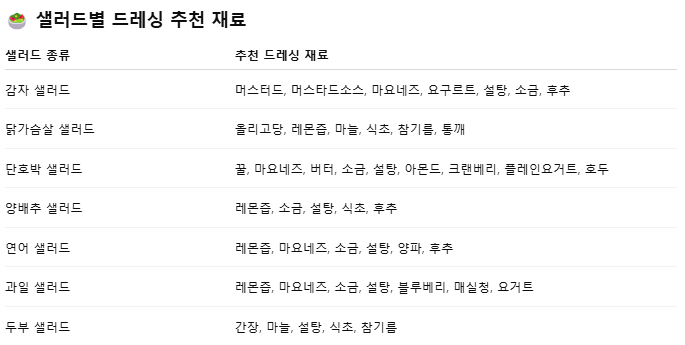

### Word Cloud 함수

In [81]:
# 재료 Word Cloud 생성 함수
def create_wordcloud(data, title):
    # 데이터를 하나의 문자열로 결합
    text = " ".join([str(item) for item in data])
    font_path = fm.findfont(fm.FontProperties(family=['NanumGothic']))

    # WordCloud 생성
    wordcloud = WordCloud(
        background_color='white',
        font_path=font_path,  # 찾은 나눔 폰트 경로 사용
        width=800,
        height=400
    ).generate(text)

    # Word Cloud 출력
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

    ingredient_counts = Counter(data)
    print(f"\n{title} - 재료별 빈도수:")
    for ingredient, count in ingredient_counts.most_common(10):
      print(f"{ingredient}: {count}")

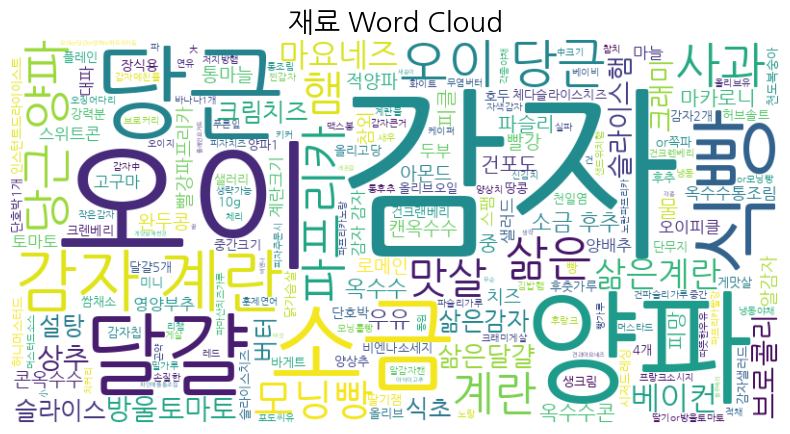


재료 Word Cloud - 재료별 빈도수:
감자: 174
오이: 99
당근: 82
양파: 77
계란: 45
소금: 41
달걀: 28
식빵: 28
사과: 20
파프리카: 18


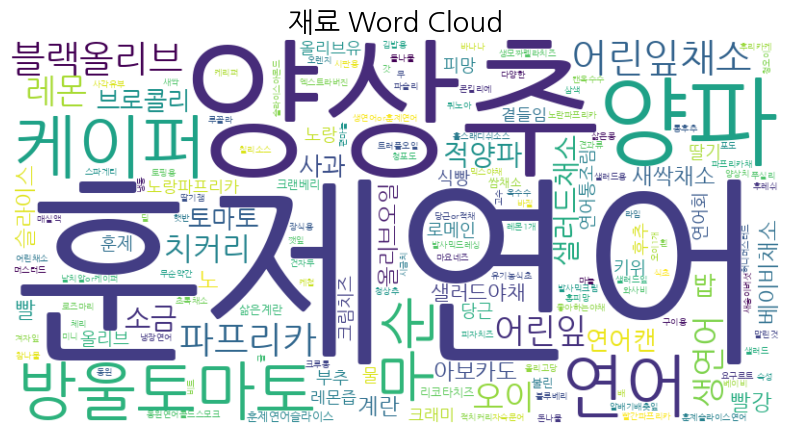


재료 Word Cloud - 재료별 빈도수:
훈제연어: 33
양상추: 31
양파: 31
케이퍼: 18
연어: 17
방울토마토: 14
무순: 12
어린잎채소: 10
블랙올리브: 9
어린잎: 7


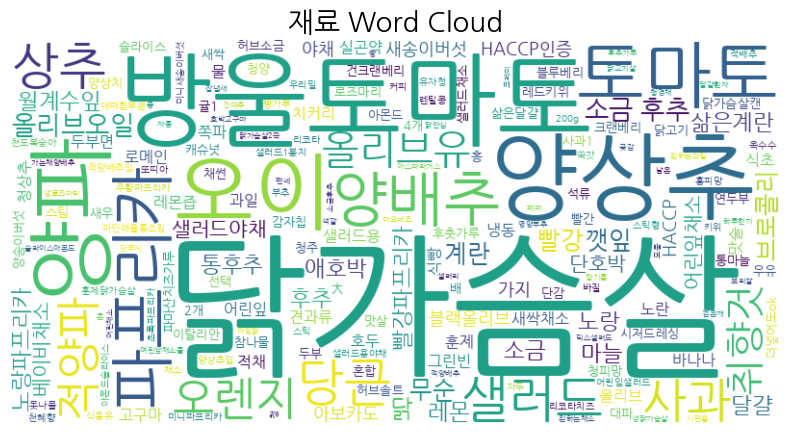


재료 Word Cloud - 재료별 빈도수:
닭가슴살: 98
방울토마토: 30
양상추: 28
양파: 23
오이: 20
토마토: 16
파프리카: 13
후추: 12
소금: 12
상추: 10


In [82]:
# '재료' Word Cloud 생성
create_wordcloud(potato_salad["재료"].explode().tolist(), "재료 Word Cloud")
create_wordcloud(salmon_salad["재료"].explode().tolist(), "재료 Word Cloud")
create_wordcloud(chicken_breast_salad["재료"].explode().tolist(), "재료 Word Cloud")

### Target 데이터의 Score 컬럼 생성

- Score : ( 조회수 / 조회수 최댓값 ) + ( 추천수 / 추천수 최댓값 ) + ( 스크랩수 / 스크랩수 최댓값 )

In [ ]:
# target['SCORE'] = (target['INQ_CNT']/target['INQ_CNT'].max()) + (target['RCMM_CNT']/target['RCMM_CNT'].max()) + (target['SRAP_CNT']/target['SRAP_CNT'].max())

### Score 순으로 Target 데이터 추출

In [ ]:
# top10_target = target.sort_values('SCORE', ascending=False).head(10)
# top10_target

## KT 배달데이터

In [46]:
df = pd.read_csv('/content/drive/MyDrive/data/배달데이터/2021.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

### 시간별 도시락 배달 주문 건수 시각화

In [ ]:
dosirak_df = df[df['DLVR_NM'] == '도시락']

In [ ]:
dosirak_df.value_counts('DLVR_HOUR')

In [ ]:
dosirak_df = df[df['DLVR_NM'] == '도시락']
hourly_counts = dosirak_df['DLVR_HOUR'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='skyblue', linewidth=2)  # 마커와 색상 추가

plt.title('시간별 도시락 주문 건수', fontsize=16) # 타이틀 폰트 크기 조정
plt.xlabel('주문 시간', fontsize=12) # x축 레이블 폰트 크기 조정
plt.ylabel('주문 건수', fontsize=12) # y축 레이블 폰트 크기 조정
plt.xticks(range(24)) # x축 눈금을 0부터 23까지 표시
plt.grid(axis='y', linestyle='--', alpha=0.7) # y축에 그리드 추가
plt.ylim(bottom=0) # y축 최소값을 0으로 설정

# 데이터 값 표시
for x, y in zip(hourly_counts.index, hourly_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10) # 각 점 위에 주문 건수 표시


plt.show()


### 시간별 전체 배달 주문 건수

In [ ]:
hourly_counts = df['DLVR_HOUR'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='skyblue', linewidth=2)  # 마커와 색상 추가

plt.title('시간별 도시락 주문 건수', fontsize=16) # 타이틀 폰트 크기 조정
plt.xlabel('주문 시간', fontsize=12) # x축 레이블 폰트 크기 조정
plt.ylabel('주문 건수', fontsize=12) # y축 레이블 폰트 크기 조정
plt.xticks(range(24)) # x축 눈금을 0부터 23까지 표시
plt.grid(axis='y', linestyle='--', alpha=0.7) # y축에 그리드 추가
plt.ylim(bottom=0) # y축 최소값을 0으로 설정

# 데이터 값 표시
for x, y in zip(hourly_counts.index, hourly_counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10) # 각 점 위에 주문 건수 표시


plt.show()
